## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too long to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.1, 0.01, 1e-3]
redice_lr_patient = [5, 10, 15]

In [11]:
from keras.layers import BatchNormalization

In [13]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor,
                                  min_lr=1e-12,
                                  monitor='val_loss',
                                  patience=reduce_patient,
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.10, reduce_patient: 5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 790,282
Trainable params: 789,770
Non-trainable params: 512
_________________________________________________________________
Epoch 1/25
49/49 [==============================] - 2s 35ms/step - loss: 2.1664 - accuracy: 0.2638 - val_loss: 2.0421 - val_accuracy: 0.2446 - lr: 0.0010
Epoch 2/25
49/49 [===================

Epoch 17/25
49/49 [==============================] - 2s 44ms/step - loss: 1.4239 - accuracy: 0.5080 - val_loss: 1.5037 - val_accuracy: 0.4726 - lr: 0.0010
Epoch 18/25
49/49 [==============================] - 2s 35ms/step - loss: 1.4118 - accuracy: 0.5117 - val_loss: 1.4927 - val_accuracy: 0.4756 - lr: 0.0010
Epoch 19/25
49/49 [==============================] - 2s 39ms/step - loss: 1.3997 - accuracy: 0.5160 - val_loss: 1.4870 - val_accuracy: 0.4817 - lr: 0.0010
Epoch 20/25
49/49 [==============================] - 2s 42ms/step - loss: 1.3893 - accuracy: 0.5200 - val_loss: 1.4757 - val_accuracy: 0.4860 - lr: 0.0010
Epoch 21/25
49/49 [==============================] - 2s 40ms/step - loss: 1.3786 - accuracy: 0.5240 - val_loss: 1.4880 - val_accuracy: 0.4801 - lr: 0.0010
Epoch 22/25
49/49 [==============================] - 2s 43ms/step - loss: 1.3685 - accuracy: 0.5289 - val_loss: 1.4703 - val_accuracy: 0.4851 - lr: 0.0010
Epoch 23/25
49/49 [==============================] - 2s 37ms/step - lo

Epoch 8/25
49/49 [==============================] - 2s 35ms/step - loss: 1.5594 - accuracy: 0.4599 - val_loss: 1.6134 - val_accuracy: 0.4403 - lr: 0.0010
Epoch 9/25
49/49 [==============================] - 2s 37ms/step - loss: 1.5398 - accuracy: 0.4677 - val_loss: 1.5881 - val_accuracy: 0.4506 - lr: 0.0010
Epoch 10/25
49/49 [==============================] - 2s 32ms/step - loss: 1.5221 - accuracy: 0.4736 - val_loss: 1.5768 - val_accuracy: 0.4513 - lr: 0.0010
Epoch 11/25
49/49 [==============================] - 2s 31ms/step - loss: 1.5055 - accuracy: 0.4795 - val_loss: 1.5585 - val_accuracy: 0.4580 - lr: 0.0010
Epoch 12/25
49/49 [==============================] - 2s 31ms/step - loss: 1.4903 - accuracy: 0.4851 - val_loss: 1.5526 - val_accuracy: 0.4599 - lr: 0.0010
Epoch 13/25
49/49 [==============================] - 2s 32ms/step - loss: 1.4760 - accuracy: 0.4890 - val_loss: 1.5395 - val_accuracy: 0.4607 - lr: 0.0010
Epoch 14/25
49/49 [==============================] - 2s 32ms/step - loss

49/49 [==============================] - 2s 39ms/step - loss: 2.1272 - accuracy: 0.2744 - val_loss: 2.1067 - val_accuracy: 0.2041 - lr: 0.0010
Epoch 2/25
49/49 [==============================] - 2s 32ms/step - loss: 1.7871 - accuracy: 0.3760 - val_loss: 1.9498 - val_accuracy: 0.2790 - lr: 0.0010
Epoch 3/25
49/49 [==============================] - 2s 32ms/step - loss: 1.7101 - accuracy: 0.4034 - val_loss: 1.8287 - val_accuracy: 0.3639 - lr: 0.0010
Epoch 4/25
49/49 [==============================] - 2s 35ms/step - loss: 1.6643 - accuracy: 0.4228 - val_loss: 1.7625 - val_accuracy: 0.3969 - lr: 0.0010
Epoch 5/25
49/49 [==============================] - 2s 34ms/step - loss: 1.6308 - accuracy: 0.4341 - val_loss: 1.7073 - val_accuracy: 0.4134 - lr: 0.0010
Epoch 6/25
49/49 [==============================] - 2s 36ms/step - loss: 1.6035 - accuracy: 0.4458 - val_loss: 1.6714 - val_accuracy: 0.4234 - lr: 0.0010
Epoch 7/25
49/49 [==============================] - 3s 53ms/step - loss: 1.5802 - accur

Epoch 23/25
49/49 [==============================] - 2s 34ms/step - loss: 1.3421 - accuracy: 0.5334 - val_loss: 1.4642 - val_accuracy: 0.4830 - lr: 0.0010
Epoch 24/25
49/49 [==============================] - 2s 34ms/step - loss: 1.3317 - accuracy: 0.5386 - val_loss: 1.4708 - val_accuracy: 0.4832 - lr: 0.0010
Epoch 25/25
49/49 [==============================] - 2s 34ms/step - loss: 1.3213 - accuracy: 0.5428 - val_loss: 1.4605 - val_accuracy: 0.4884 - lr: 0.0010
Numbers of exp: 7, reduce_factor: 0.00, reduce_patient: 10
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024    

Epoch 14/25
49/49 [==============================] - 2s 36ms/step - loss: 1.4424 - accuracy: 0.5010 - val_loss: 1.5119 - val_accuracy: 0.4720 - lr: 0.0010
Epoch 15/25
49/49 [==============================] - 2s 35ms/step - loss: 1.4298 - accuracy: 0.5043 - val_loss: 1.5077 - val_accuracy: 0.4719 - lr: 0.0010
Epoch 16/25
49/49 [==============================] - 2s 35ms/step - loss: 1.4179 - accuracy: 0.5084 - val_loss: 1.5132 - val_accuracy: 0.4681 - lr: 0.0010
Epoch 17/25
49/49 [==============================] - 2s 39ms/step - loss: 1.4044 - accuracy: 0.5141 - val_loss: 1.4915 - val_accuracy: 0.4767 - lr: 0.0010
Epoch 18/25
49/49 [==============================] - 2s 34ms/step - loss: 1.3939 - accuracy: 0.5178 - val_loss: 1.4882 - val_accuracy: 0.4810 - lr: 0.0010
Epoch 19/25
49/49 [==============================] - 2s 34ms/step - loss: 1.3820 - accuracy: 0.5212 - val_loss: 1.4801 - val_accuracy: 0.4791 - lr: 0.0010
Epoch 20/25
49/49 [==============================] - 2s 35ms/step - lo

49/49 [==============================] - 2s 36ms/step - loss: 1.8356 - accuracy: 0.3551 - val_loss: 1.9955 - val_accuracy: 0.2706 - lr: 1.0000e-05
Epoch 3/25
49/49 [==============================] - 2s 44ms/step - loss: 1.7735 - accuracy: 0.3791 - val_loss: 1.9132 - val_accuracy: 0.3227 - lr: 1.0000e-05
Epoch 4/25
49/49 [==============================] - 2s 36ms/step - loss: 1.7371 - accuracy: 0.3941 - val_loss: 1.8311 - val_accuracy: 0.3679 - lr: 1.0000e-05
Epoch 5/25
49/49 [==============================] - 2s 36ms/step - loss: 1.7101 - accuracy: 0.4039 - val_loss: 1.7951 - val_accuracy: 0.3705 - lr: 1.0000e-05
Epoch 6/25
49/49 [==============================] - 2s 35ms/step - loss: 1.6894 - accuracy: 0.4122 - val_loss: 1.7481 - val_accuracy: 0.3912 - lr: 1.0000e-05
Epoch 7/25
49/49 [==============================] - 2s 35ms/step - loss: 1.6718 - accuracy: 0.4202 - val_loss: 1.7082 - val_accuracy: 0.4032 - lr: 1.0000e-05
Epoch 8/25
49/49 [==============================] - 2s 34ms/ste

Epoch 23/25
49/49 [==============================] - 2s 38ms/step - loss: 1.5273 - accuracy: 0.4772 - val_loss: 1.5873 - val_accuracy: 0.4504 - lr: 1.0000e-05
Epoch 24/25
49/49 [==============================] - 2s 37ms/step - loss: 1.5227 - accuracy: 0.4799 - val_loss: 1.5865 - val_accuracy: 0.4457 - lr: 1.0000e-05
Epoch 25/25
49/49 [==============================] - 2s 37ms/step - loss: 1.5180 - accuracy: 0.4810 - val_loss: 1.5802 - val_accuracy: 0.4530 - lr: 1.0000e-05
Numbers of exp: 12, reduce_factor: 0.01, reduce_patient: 5
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_41 (Batc (None, 256)          

Epoch 13/25
49/49 [==============================] - 2s 37ms/step - loss: 1.5857 - accuracy: 0.4534 - val_loss: 1.6265 - val_accuracy: 0.4337 - lr: 1.0000e-05
Epoch 14/25
49/49 [==============================] - 2s 37ms/step - loss: 1.5777 - accuracy: 0.4572 - val_loss: 1.6211 - val_accuracy: 0.4357 - lr: 1.0000e-05
Epoch 15/25
49/49 [==============================] - 2s 38ms/step - loss: 1.5704 - accuracy: 0.4589 - val_loss: 1.6121 - val_accuracy: 0.4370 - lr: 1.0000e-05
Epoch 16/25
49/49 [==============================] - 2s 38ms/step - loss: 1.5633 - accuracy: 0.4616 - val_loss: 1.6066 - val_accuracy: 0.4385 - lr: 1.0000e-05
Epoch 17/25
49/49 [==============================] - 2s 37ms/step - loss: 1.5556 - accuracy: 0.4650 - val_loss: 1.5992 - val_accuracy: 0.4447 - lr: 1.0000e-05
Epoch 18/25
49/49 [==============================] - 2s 38ms/step - loss: 1.5499 - accuracy: 0.4673 - val_loss: 1.5960 - val_accuracy: 0.4464 - lr: 1.0000e-05
Epoch 19/25
49/49 [===========================

Epoch 3/25
49/49 [==============================] - 2s 38ms/step - loss: 1.7324 - accuracy: 0.3985 - val_loss: 1.8718 - val_accuracy: 0.3459 - lr: 1.0000e-05
Epoch 4/25
49/49 [==============================] - 2s 39ms/step - loss: 1.6983 - accuracy: 0.4085 - val_loss: 1.8031 - val_accuracy: 0.3830 - lr: 1.0000e-05
Epoch 5/25
49/49 [==============================] - 2s 40ms/step - loss: 1.6742 - accuracy: 0.4177 - val_loss: 1.7580 - val_accuracy: 0.3934 - lr: 1.0000e-05
Epoch 6/25
49/49 [==============================] - 2s 39ms/step - loss: 1.6549 - accuracy: 0.4259 - val_loss: 1.7224 - val_accuracy: 0.4057 - lr: 1.0000e-05
Epoch 7/25
49/49 [==============================] - 2s 40ms/step - loss: 1.6383 - accuracy: 0.4309 - val_loss: 1.6890 - val_accuracy: 0.4169 - lr: 1.0000e-05
Epoch 8/25
49/49 [==============================] - 2s 38ms/step - loss: 1.6245 - accuracy: 0.4379 - val_loss: 1.6728 - val_accuracy: 0.4185 - lr: 1.0000e-05
Epoch 9/25
49/49 [==============================] - 

Epoch 24/25
49/49 [==============================] - 2s 39ms/step - loss: 1.5328 - accuracy: 0.4718 - val_loss: 1.5946 - val_accuracy: 0.4481 - lr: 1.0000e-05
Epoch 25/25
49/49 [==============================] - 2s 40ms/step - loss: 1.5287 - accuracy: 0.4741 - val_loss: 1.5891 - val_accuracy: 0.4482 - lr: 1.0000e-05
Numbers of exp: 17, reduce_factor: 0.00, reduce_patient: 15
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_56 (Batc (None, 256)               1024      
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total para

49/49 [==============================] - ETA: 0s - loss: 1.4060 - accuracy: 0.5108
Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
49/49 [==============================] - 2s 41ms/step - loss: 1.4060 - accuracy: 0.5108 - val_loss: 1.6805 - val_accuracy: 0.4055 - lr: 0.0010
Epoch 15/25
49/49 [==============================] - 2s 42ms/step - loss: 1.3326 - accuracy: 0.5395 - val_loss: 1.4652 - val_accuracy: 0.4796 - lr: 1.0000e-04
Epoch 16/25
49/49 [==============================] - 2s 42ms/step - loss: 1.3199 - accuracy: 0.5429 - val_loss: 1.4472 - val_accuracy: 0.4866 - lr: 1.0000e-04
Epoch 17/25
49/49 [==============================] - 2s 43ms/step - loss: 1.3157 - accuracy: 0.5458 - val_loss: 1.4419 - val_accuracy: 0.4933 - lr: 1.0000e-04
Epoch 18/25
49/49 [==============================] - 2s 43ms/step - loss: 1.3110 - accuracy: 0.5467 - val_loss: 1.4330 - val_accuracy: 0.4969 - lr: 1.0000e-04
Epoch 19/25
49/49 [==============================] - 2s 4

Epoch 3/25
49/49 [==============================] - 2s 45ms/step - loss: 1.6320 - accuracy: 0.4338 - val_loss: 1.8419 - val_accuracy: 0.3604 - lr: 1.0000e-04
Epoch 4/25
49/49 [==============================] - 2s 45ms/step - loss: 1.5871 - accuracy: 0.4507 - val_loss: 1.7552 - val_accuracy: 0.3850 - lr: 1.0000e-04
Epoch 5/25
49/49 [==============================] - 2s 47ms/step - loss: 1.5514 - accuracy: 0.4624 - val_loss: 1.6828 - val_accuracy: 0.4206 - lr: 1.0000e-04
Epoch 6/25
49/49 [==============================] - 2s 51ms/step - loss: 1.5207 - accuracy: 0.4745 - val_loss: 1.6659 - val_accuracy: 0.4142 - lr: 1.0000e-04
Epoch 7/25
49/49 [==============================] - 2s 41ms/step - loss: 1.4949 - accuracy: 0.4833 - val_loss: 1.7138 - val_accuracy: 0.4034 - lr: 1.0000e-04
Epoch 8/25
49/49 [==============================] - 2s 44ms/step - loss: 1.4722 - accuracy: 0.4914 - val_loss: 1.6872 - val_accuracy: 0.4102 - lr: 1.0000e-04
Epoch 9/25
49/49 [==============================] - 

Epoch 24/25
49/49 [==============================] - 2s 43ms/step - loss: 1.2410 - accuracy: 0.5722 - val_loss: 1.5370 - val_accuracy: 0.4622 - lr: 1.0000e-04
Epoch 25/25
49/49 [==============================] - 2s 43ms/step - loss: 1.2301 - accuracy: 0.5768 - val_loss: 1.5220 - val_accuracy: 0.4650 - lr: 1.0000e-04
Numbers of exp: 22, reduce_factor: 0.01, reduce_patient: 10
Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_71 (Batc (None, 256)               1024      
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total para

Epoch 14/25
49/49 [==============================] - 2s 43ms/step - loss: 1.3569 - accuracy: 0.5319 - val_loss: 1.6472 - val_accuracy: 0.4231 - lr: 1.0000e-04
Epoch 15/25
49/49 [==============================] - 2s 43ms/step - loss: 1.3424 - accuracy: 0.5368 - val_loss: 1.5245 - val_accuracy: 0.4583 - lr: 1.0000e-04
Epoch 16/25
49/49 [==============================] - 2s 44ms/step - loss: 1.3271 - accuracy: 0.5415 - val_loss: 1.6115 - val_accuracy: 0.4279 - lr: 1.0000e-04
Epoch 17/25
49/49 [==============================] - 2s 44ms/step - loss: 1.3167 - accuracy: 0.5454 - val_loss: 1.5706 - val_accuracy: 0.4427 - lr: 1.0000e-04
Epoch 18/25
49/49 [==============================] - 2s 44ms/step - loss: 1.3013 - accuracy: 0.5509 - val_loss: 1.4910 - val_accuracy: 0.4791 - lr: 1.0000e-04
Epoch 19/25
49/49 [==============================] - 2s 45ms/step - loss: 1.2881 - accuracy: 0.5561 - val_loss: 1.5307 - val_accuracy: 0.4596 - lr: 1.0000e-04
Epoch 20/25
49/49 [===========================

Epoch 3/25
49/49 [==============================] - 2s 46ms/step - loss: 2.9387 - accuracy: 0.0826 - val_loss: 2.5074 - val_accuracy: 0.0754 - lr: 1.0000e-07
Epoch 4/25
49/49 [==============================] - 2s 45ms/step - loss: 2.9264 - accuracy: 0.0828 - val_loss: 2.5393 - val_accuracy: 0.0768 - lr: 1.0000e-07
Epoch 5/25
49/49 [==============================] - 2s 45ms/step - loss: 2.9135 - accuracy: 0.0844 - val_loss: 2.5775 - val_accuracy: 0.0808 - lr: 1.0000e-07
Epoch 6/25
49/49 [==============================] - 2s 44ms/step - loss: 2.9008 - accuracy: 0.0851 - val_loss: 2.6165 - val_accuracy: 0.0836 - lr: 1.0000e-07
Epoch 7/25
49/49 [==============================] - 2s 47ms/step - loss: 2.8892 - accuracy: 0.0877 - val_loss: 2.6527 - val_accuracy: 0.0859 - lr: 1.0000e-07
Epoch 8/25
49/49 [==============================] - 2s 47ms/step - loss: 2.8766 - accuracy: 0.0888 - val_loss: 2.6839 - val_accuracy: 0.0886 - lr: 1.0000e-07
Epoch 9/25
49/49 [==============================] - 

Epoch 22/25
49/49 [==============================] - 2s 43ms/step - loss: 3.0192 - accuracy: 0.1041 - val_loss: 3.0119 - val_accuracy: 0.1060 - lr: 1.0000e-12
Epoch 23/25
49/49 [==============================] - 2s 44ms/step - loss: 3.0186 - accuracy: 0.1048 - val_loss: 3.0124 - val_accuracy: 0.1060 - lr: 1.0000e-12
Epoch 24/25
49/49 [==============================] - 2s 45ms/step - loss: 3.0184 - accuracy: 0.1042 - val_loss: 3.0128 - val_accuracy: 0.1060 - lr: 1.0000e-12
Epoch 25/25
49/49 [==============================] - 2s 44ms/step - loss: 3.0183 - accuracy: 0.1041 - val_loss: 3.0128 - val_accuracy: 0.1059 - lr: 1.0000e-12


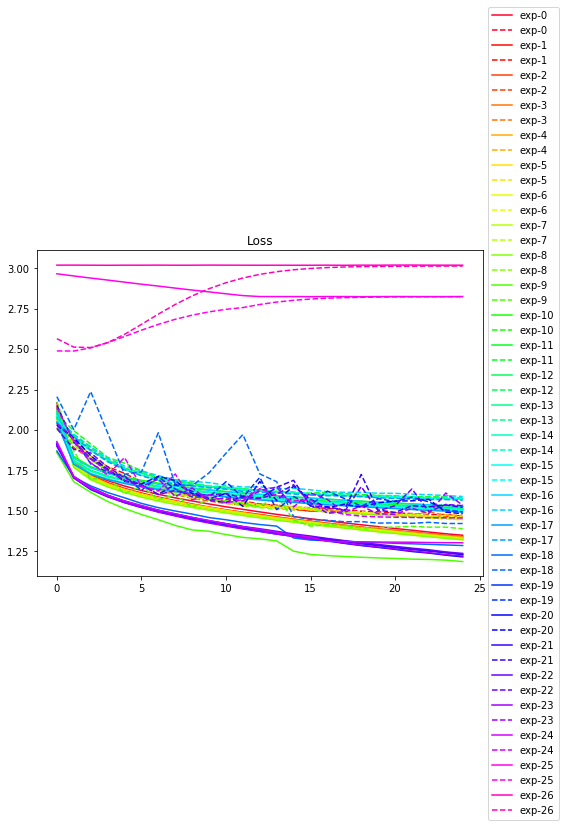

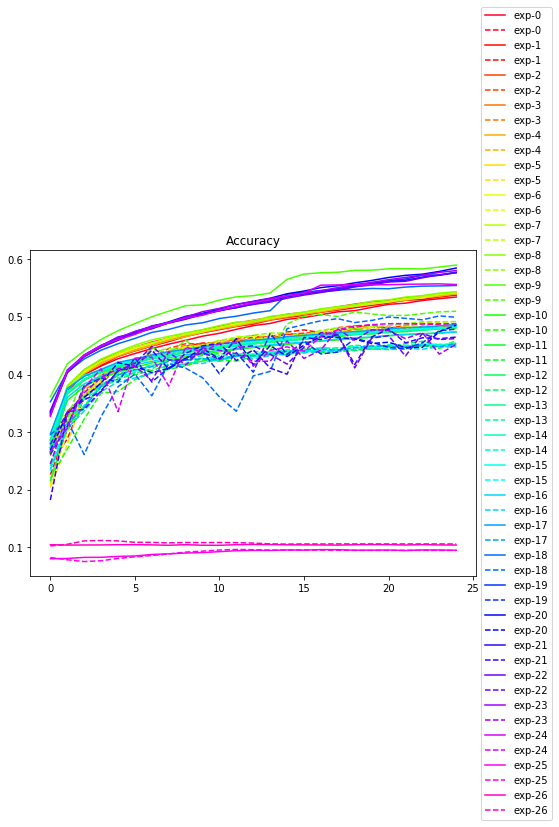

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()